<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [617]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-gmt", interval="minute240")
df

,open,high,low,close,volume,value
2022-09-10 13:00:00,1070.0,1085.0,1030.0,1040.0,2.873733e+06,3.033466e+09
2022-09-10 17:00:00,1035.0,1050.0,1025.0,1040.0,1.430250e+06,1.482415e+09
2022-09-10 21:00:00,1040.0,1040.0,1010.0,1015.0,1.671459e+06,1.707858e+09
2022-09-11 01:00:00,1015.0,1020.0,1005.0,1020.0,1.412139e+06,1.431138e+09
2022-09-11 05:00:00,1015.0,1035.0,1005.0,1025.0,1.968347e+06,2.004086e+09
...,...,...,...,...,...,...
2022-10-13 01:00:00,1065.0,1065.0,1050.0,1060.0,4.979749e+05,5.264737e+08
2022-10-13 05:00:00,1060.0,1095.0,1060.0,1095.0,2.122076e+06,2.292447e+09
2022-10-13 09:00:00,1095.0,1100.0,1005.0,1020.0,8.224805e+06,8.544036e+09
2022-10-13 13:00:00,1015.0,1020.0,950.0,970.0,6.916572e+06,6.809513e+09


In [618]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-10 13:00:00,1040.0
1,2022-09-10 17:00:00,1040.0
2,2022-09-10 21:00:00,1015.0
3,2022-09-11 01:00:00,1020.0
4,2022-09-11 05:00:00,1025.0
...,...,...
195,2022-10-13 01:00:00,1060.0
196,2022-10-13 05:00:00,1095.0
197,2022-10-13 09:00:00,1020.0
198,2022-10-13 13:00:00,970.0


In [619]:
#prophet 불러옴
from fbprophet import Prophet

In [620]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [621]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=100, freq='H')
forecast = model.predict(future)

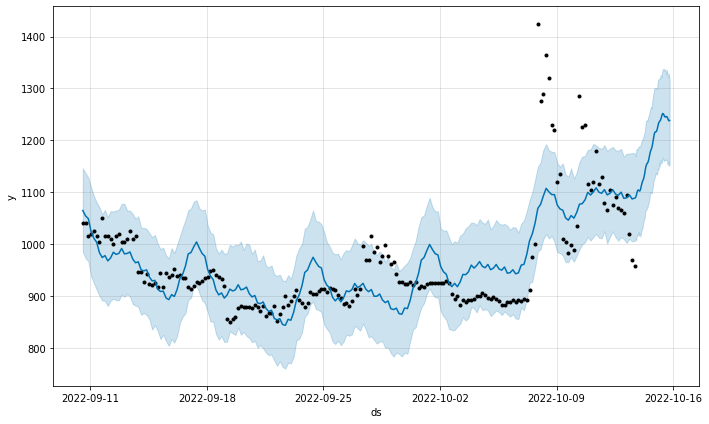

In [622]:
#그래프1
fig1 = model.plot(forecast)

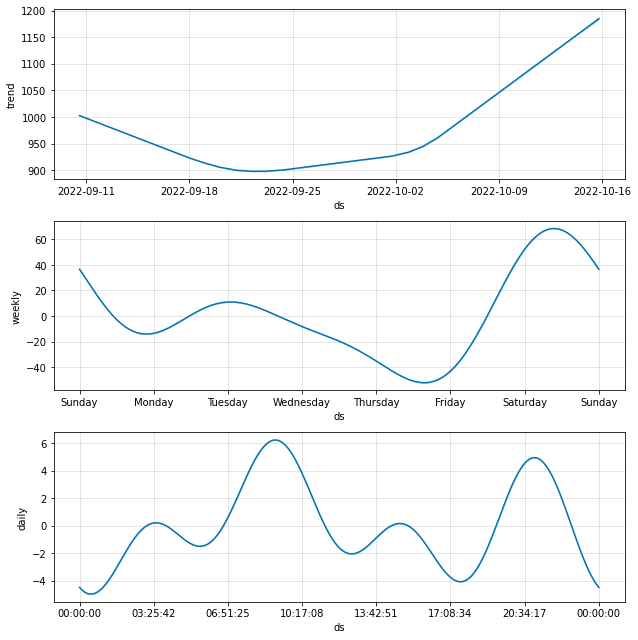

In [616]:
 #그래프2
fig2 = model.plot_components(forecast)